In [ ]:
# если вылетают ошибки, значит не установлены библиотеки - разкомментируйте строчку ниже, вставьте название недостающей библиотеки
#!pip install <название библиотеки в traceback>

In [22]:
name1 = 'in/1.tif'
name2 = 'in/2.tif'
name3 = 'in/3.tif'
name4 = 'in/4.tif'
name5 = 'in/5.tif'

# Можно поменять снимок заменой name1
sample_data_file_name = name1

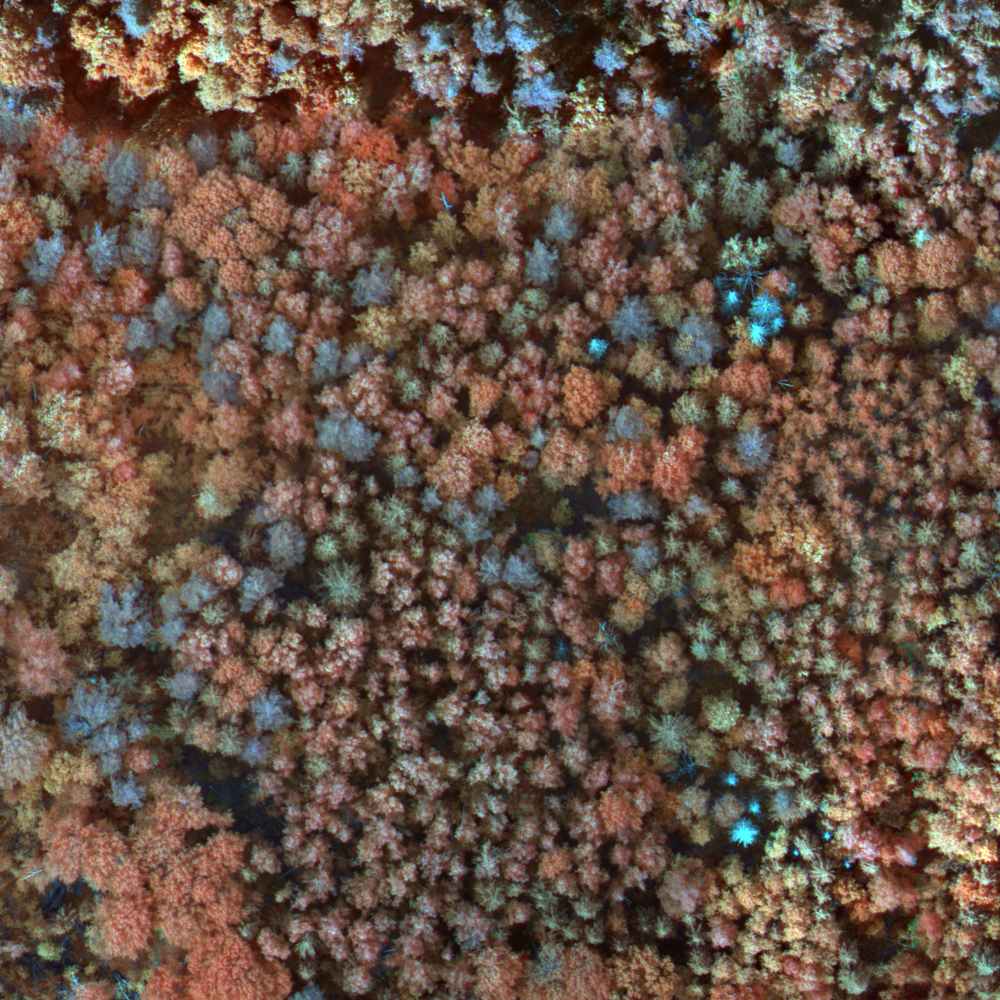

In [23]:
import skimage.io
import io, json, codecs
from IPython.display import Image

# Read image into scimage package
img = skimage.io.imread(sample_data_file_name)
skimage.io.imsave('original.png', img)

# Display original image
display(Image(filename='original.png',width=800, height=800))

In [28]:
from osgeo import gdal, osr
import numpy as np
from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries
from skimage.measure import regionprops
import csv

# Prepare result structure
result = {
    "trees": []
}

# Open image with gdal
ds = gdal.Open(sample_data_file_name)
xoff, a, b, yoff, d, e = ds.GetGeoTransform()

# Get projection information from source image
ds_proj = ds.GetProjectionRef()
ds_srs = osr.SpatialReference(ds_proj)

# Get the source image's geographic coordinate system (the 'GEOGCS' node of ds_srs)
geogcs = ds_srs.CloneGeogCS()

# Set up a transformation between projected coordinates (x, y) & geographic coordinates (lat, lon)
transform = osr.CoordinateTransformation(ds_srs, geogcs)

# Convert multi-channel image it into red, green and blueb[, alpha] channels 
red, green, blue = np.rollaxis(np.array(img), axis=-1)
alpha = 0



# Mask: threshold + stops canny detecting image boundary edges
mask = blue > 240
mask1 = red < 90
mask2 = green < 200

# Create mask for edge detection
skimage.io.imsave('mask.png', (mask * 255).astype(np.uint8))
skimage.io.imsave('mask1.png', (mask1 * 255).astype(np.uint8))
skimage.io.imsave('mask2.png', (mask2 * 255).astype(np.uint8))


# Use Felzenszwalb algo to find segements
segments_fz = felzenszwalb(np.dstack((mask, mask1, mask2)),
                               scale=3700,
                               sigma=2,
                               min_size=4) 




# Build labeled mask to show where trees were dectected
segmented_img = mark_boundaries(np.dstack((mask, mask1, mask2)), segments_fz)
skimage.io.imsave('mask_labeled.png', segmented_img.astype(np.uint8))
segmented_img1 = mark_boundaries((mask1 * 255).astype(np.uint8), segments_fz)
skimage.io.imsave('mask_labeled1.png', segmented_img1.astype(np.uint8))
segmented_img2 = mark_boundaries((mask2 * 255).astype(np.uint8), segments_fz)
skimage.io.imsave('mask_labeled2.png', segmented_img2.astype(np.uint8))

# Count trees and save image of each tree clipped from masked image
k=0

for idx, tree in enumerate(regionprops(segments_fz)):
    
    # If area matches that of a stanard tree, count it
    if (tree.area >= 2 and tree.area <= 100):
        
        # Incrment count
        k+=1
        
        # Create tree thumbnail
        x, y = (int(np.average([tree.bbox[0],
                                tree.bbox[2]])),
                                int(np.average([tree.bbox[1],
                                tree.bbox[3]])))
        sx, ex = max(x - 35, 0), min(x + 35, img.shape[0] - 1)
        sy, ey = max(y - 35, 0), min(y + 35, img.shape[1] - 1)
        img_tree = img[sx:ex, sy:ey]
        skimage.io.imsave('tree-id_' + str(idx + 1) + '-count_' + str(k) +'.png', img_tree)

        # Get global coordinates from pixel x, y coords
        projected_x = a * y + b * x + xoff
        projected_y = d * y + e * x + yoff
        
        # Transform from projected x, y to geographic lat, lng
        (lat, lng, elev) = transform.TransformPoint(projected_x, projected_y)
        
             
        
        # Add tree to results cluster
        result["trees"].append({
            "id": idx + 1,
            "tree_count": k,
            "lat": lat,
            "lng": lng
        })
        


/var/folders/p9/cc_08x7974z5tjgr1ssq19s80000gn/T/ipykernel_94163/641004544.py:39: UserWarning: mask.png is a low contrast image
  skimage.io.imsave('mask.png', (mask * 255).astype(np.uint8))
/var/folders/p9/cc_08x7974z5tjgr1ssq19s80000gn/T/ipykernel_94163/641004544.py:55: UserWarning: mask_labeled.png is a low contrast image
  skimage.io.imsave('mask_labeled.png', segmented_img.astype(np.uint8))
/var/folders/p9/cc_08x7974z5tjgr1ssq19s80000gn/T/ipykernel_94163/641004544.py:57: UserWarning: mask_labeled1.png is a low contrast image
  skimage.io.imsave('mask_labeled1.png', segmented_img1.astype(np.uint8))
/var/folders/p9/cc_08x7974z5tjgr1ssq19s80000gn/T/ipykernel_94163/641004544.py:59: UserWarning: mask_labeled2.png is a low contrast image
  skimage.io.imsave('mask_labeled2.png', segmented_img2.astype(np.uint8))


{
  "trees": [
    {
      "id": 1,
      "tree_count": 1,
      "lat": 55.512278913985185,
      "lng": 40.0127473092229
    },
    {
      "id": 3,
      "tree_count": 2,
      "lat": 55.51227498773562,
      "lng": 40.013041681702944
    },
    {
      "id": 4,
      "tree_count": 3,
      "lat": 55.51227186537949,
      "lng": 40.01323879343462
    },
    {
      "id": 5,
      "tree_count": 4,
      "lat": 55.51227298735327,
      "lng": 40.01328351909711
    },
    {
      "id": 6,
      "tree_count": 5,
      "lat": 55.512271651557576,
      "lng": 40.013625284132836
    },
    {
      "id": 7,
      "tree_count": 6,
      "lat": 55.512247844054144,
      "lng": 40.01487881234696
    },
    {
      "id": 8,
      "tree_count": 7,
      "lat": 55.51226435792515,
      "lng": 40.013785479437274
    },
    {
      "id": 9,
      "tree_count": 8,
      "lat": 55.51224829018882,
      "lng": 40.01500502661096
    },
    {
      "id": 10,
      "tree_count": 9,
      "lat": 55.5122470

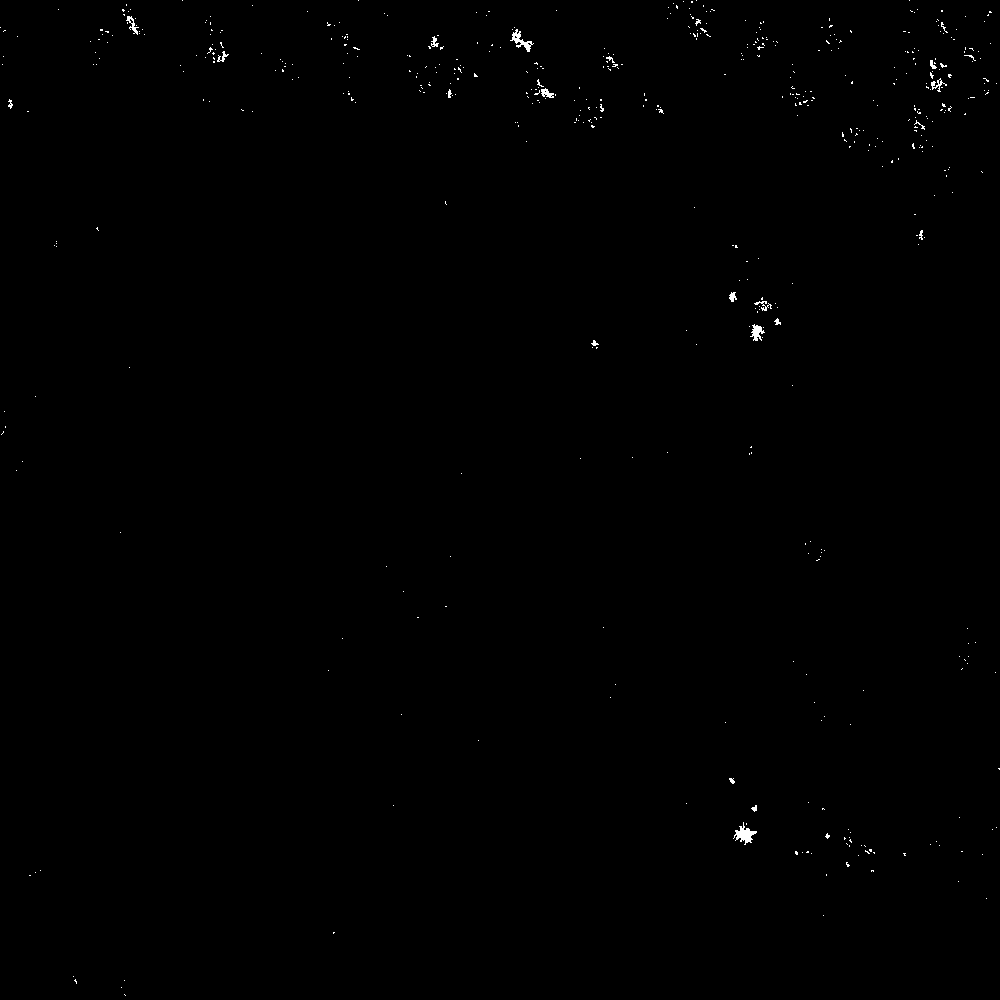

mask1.png - red:


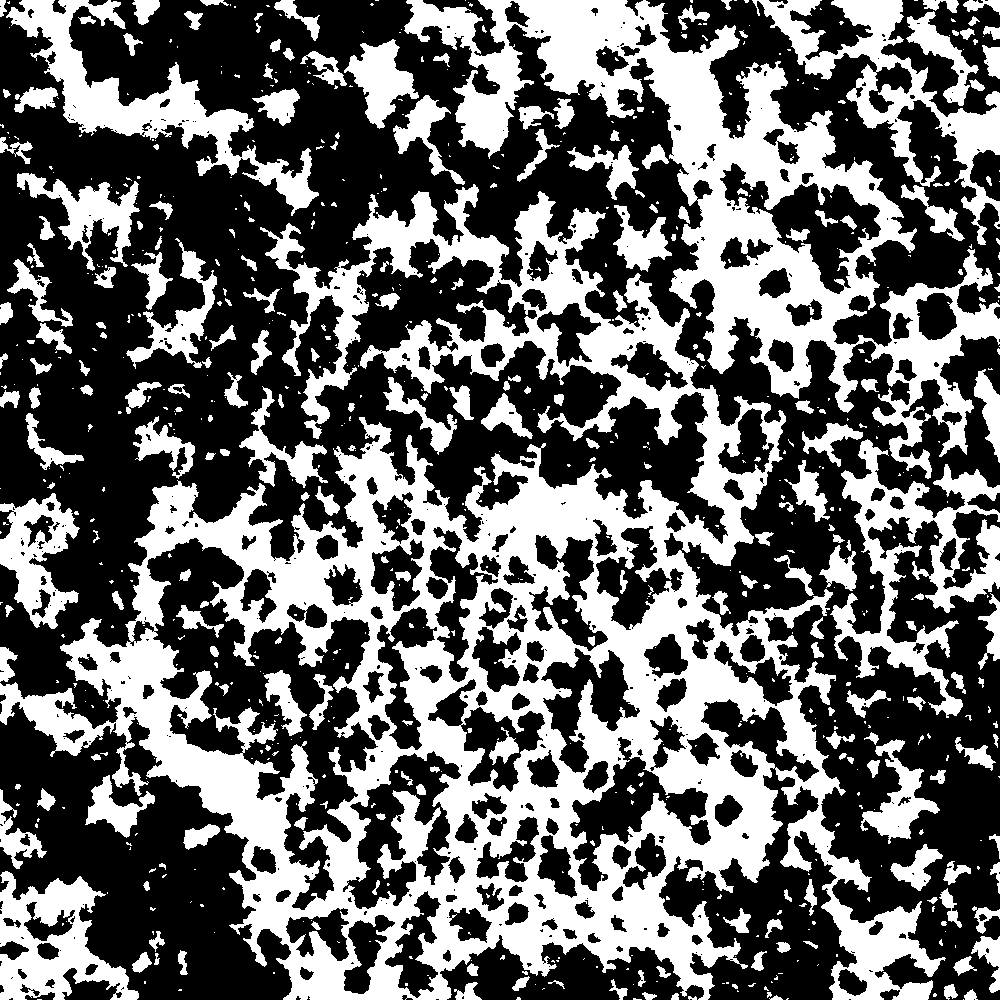

mask2.png - green:


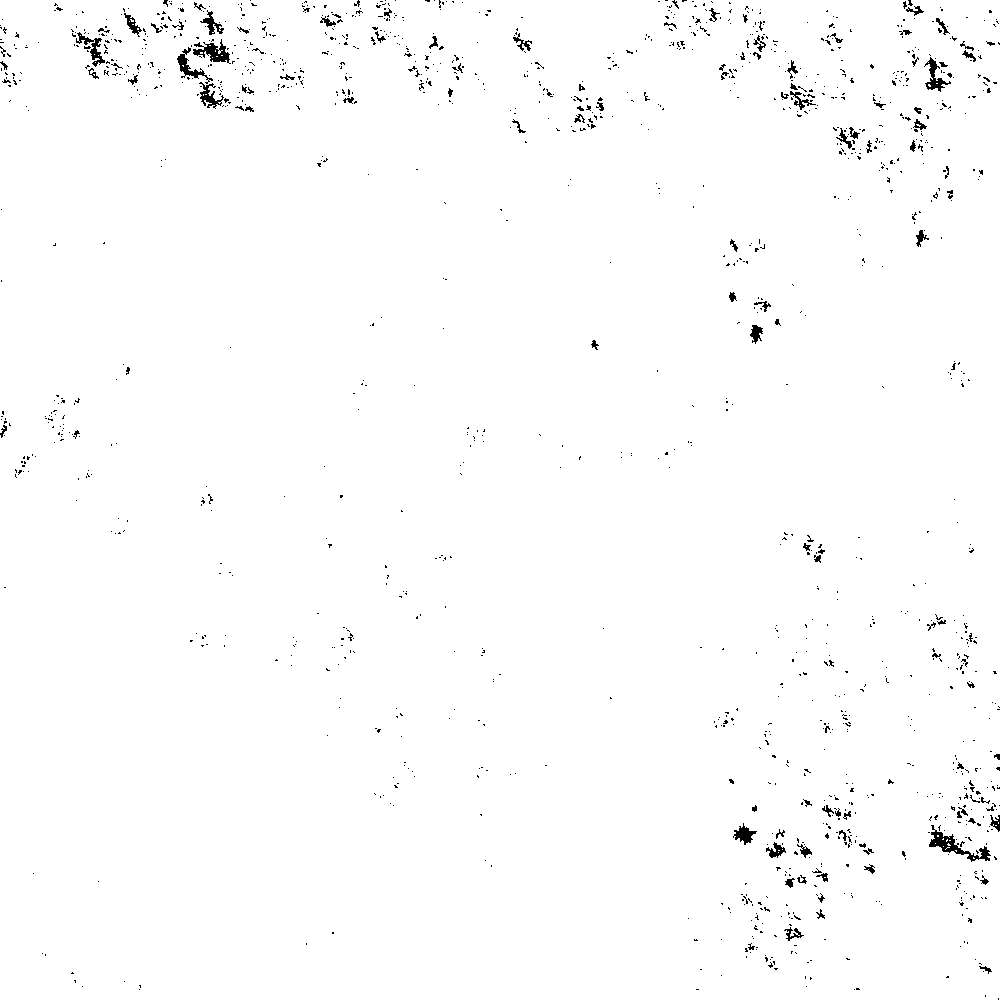

mask_labeled.png:


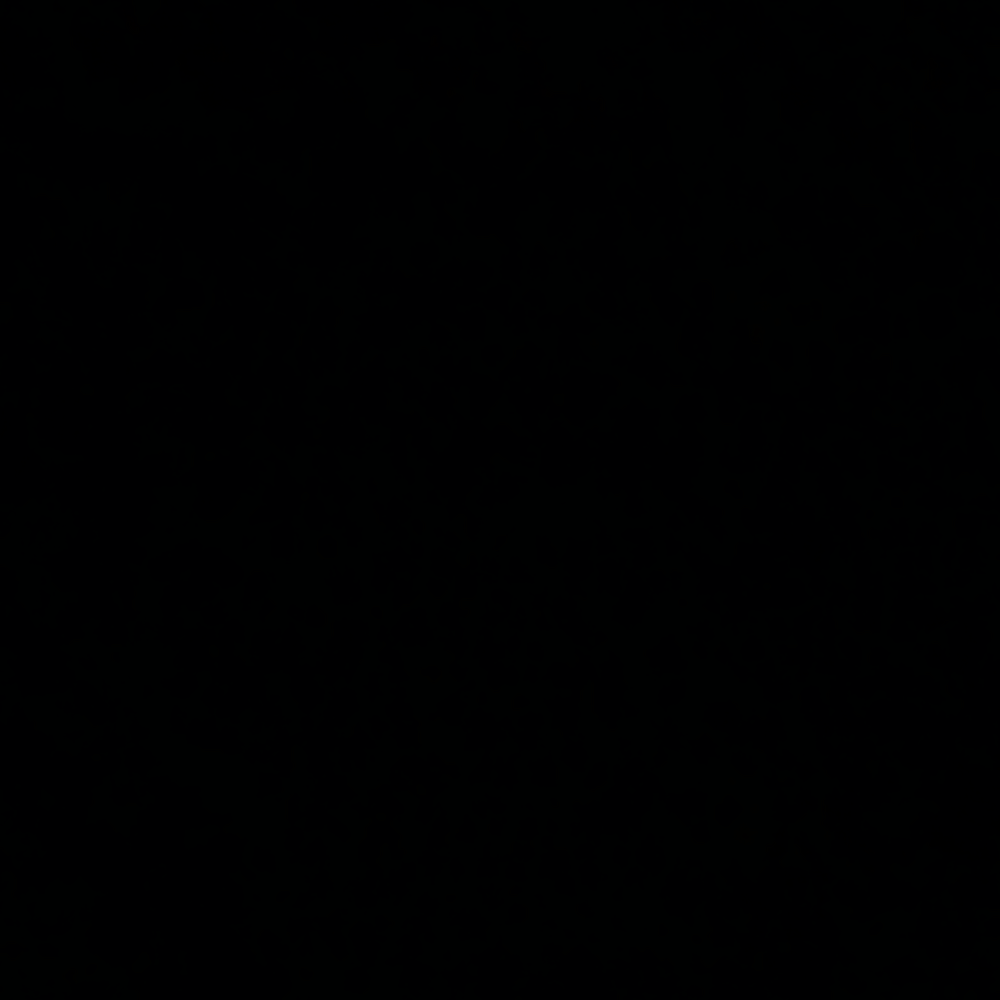

mask_labeled1.png:


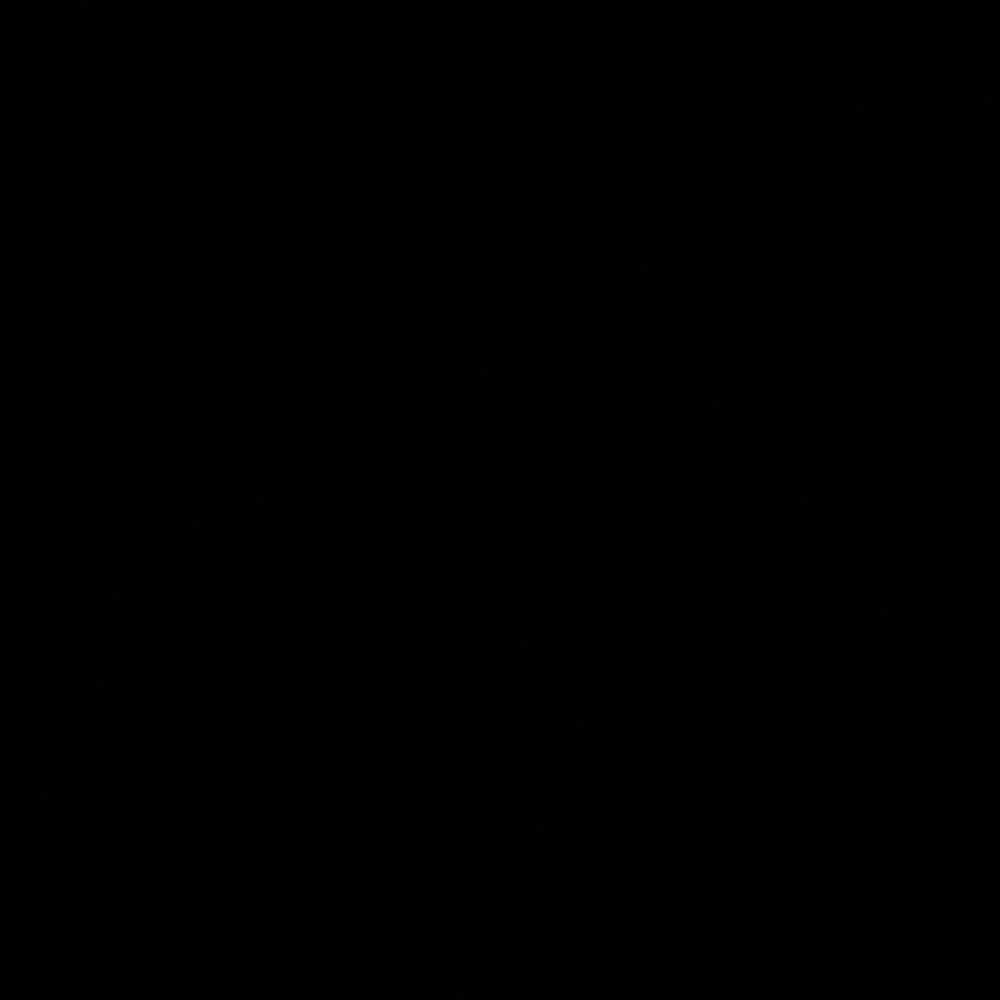

mask_labeled2;.png:


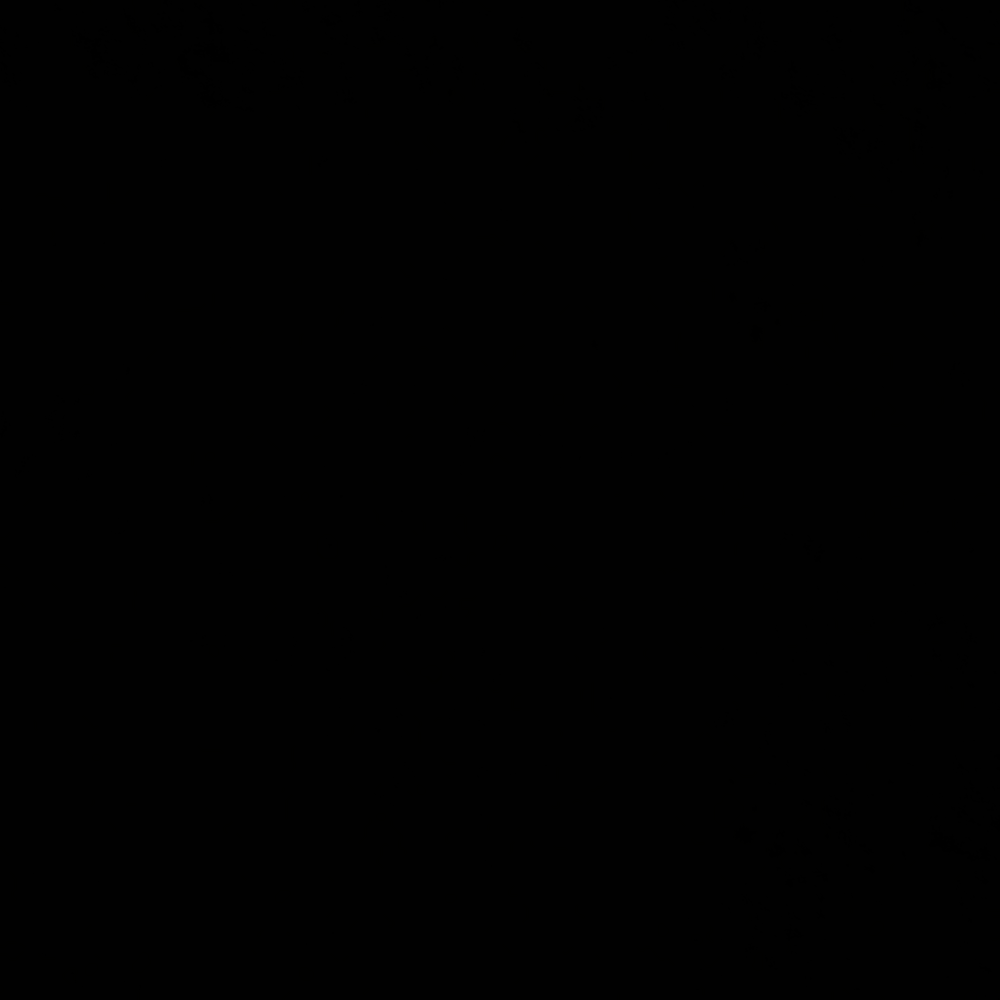

Tree-id_1-count_1.png


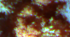

Tree-id_3-count_2.png


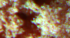

Tree-id_4-count_3.png


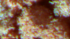

Tree-id_5-count_4.png


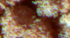

Tree-id_6-count_5.png


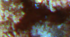

Tree-id_7-count_6.png


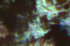

Tree-id_8-count_7.png


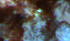

Tree-id_9-count_8.png


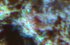

Tree-id_10-count_9.png


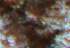

Tree-id_11-count_10.png


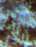

Tree-id_12-count_11.png


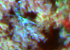

Tree-id_13-count_12.png


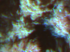

Tree-id_14-count_13.png


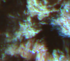

Tree-id_15-count_14.png


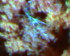

Tree-id_16-count_15.png


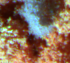

Tree-id_17-count_16.png


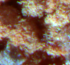

Tree-id_18-count_17.png


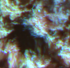

Tree-id_19-count_18.png


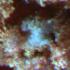

Tree-id_20-count_19.png


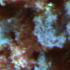

Tree-id_21-count_20.png


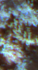

Tree-id_22-count_21.png


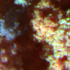

Tree-id_23-count_22.png


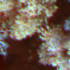

Tree-id_24-count_23.png


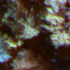

Tree-id_25-count_24.png


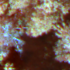

Tree-id_26-count_25.png


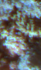

Tree-id_27-count_26.png


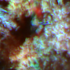

Tree-id_28-count_27.png


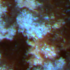

Tree-id_29-count_28.png


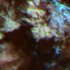

Tree-id_30-count_29.png


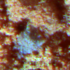

Tree-id_31-count_30.png


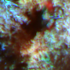

Tree-id_32-count_31.png


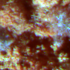

Tree-id_33-count_32.png


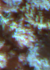

Tree-id_34-count_33.png


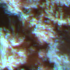

Tree-id_35-count_34.png


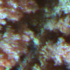

Tree-id_36-count_35.png


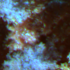

Tree-id_37-count_36.png


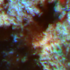

Tree-id_39-count_37.png


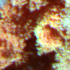

Tree-id_40-count_38.png


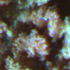

Tree-id_41-count_39.png


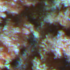

Tree-id_42-count_40.png


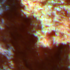

Tree-id_43-count_41.png


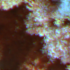

Tree-id_44-count_42.png


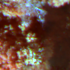

Tree-id_45-count_43.png


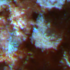

Tree-id_46-count_44.png


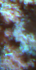

Tree-id_47-count_45.png


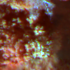

Tree-id_48-count_46.png


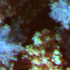

Tree-id_49-count_47.png


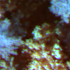

Tree-id_50-count_48.png


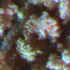

Tree-id_51-count_49.png


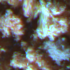

Tree-id_52-count_50.png


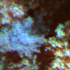

Tree-id_53-count_51.png


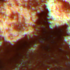

Tree-id_54-count_52.png


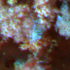

Tree-id_55-count_53.png


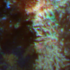

Tree-id_56-count_54.png


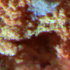

Tree-id_57-count_55.png


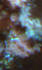

Tree-id_58-count_56.png


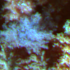

Tree-id_59-count_57.png


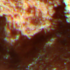

Tree-id_60-count_58.png


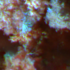

Tree-id_61-count_59.png


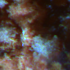

Tree-id_62-count_60.png


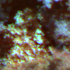

Tree-id_63-count_61.png


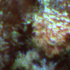

Tree-id_64-count_62.png


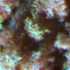

Tree-id_65-count_63.png


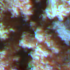

Tree-id_66-count_64.png


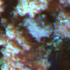

Tree-id_67-count_65.png


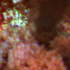

Tree-id_68-count_66.png


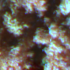

Tree-id_69-count_67.png


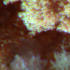

Tree-id_70-count_68.png


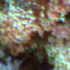

Tree-id_71-count_69.png


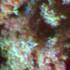

Tree-id_72-count_70.png


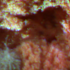

Tree-id_73-count_71.png


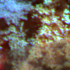

Tree-id_74-count_72.png


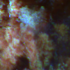

Tree-id_75-count_73.png


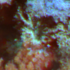

Tree-id_76-count_74.png


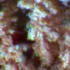

Tree-id_77-count_75.png


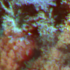

Tree-id_78-count_76.png


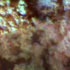

Tree-id_79-count_77.png


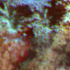

Tree-id_80-count_78.png


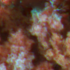

Tree-id_81-count_79.png


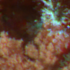

Tree-id_82-count_80.png


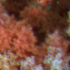

Tree-id_83-count_81.png


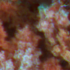

Tree-id_84-count_82.png


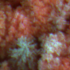

Tree-id_85-count_83.png


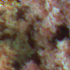

Tree-id_86-count_84.png


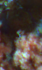

Tree-id_87-count_85.png


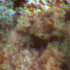

Tree-id_88-count_86.png


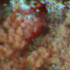

Tree-id_89-count_87.png


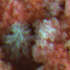

Tree-id_90-count_88.png


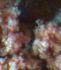

Tree-id_91-count_89.png


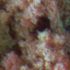

Tree-id_92-count_90.png


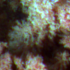

Tree-id_93-count_91.png


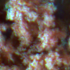

Tree-id_94-count_92.png


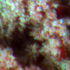

Tree-id_95-count_93.png


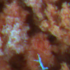

Tree-id_96-count_94.png


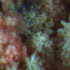

Tree-id_97-count_95.png


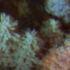

Tree-id_98-count_96.png


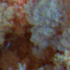

Tree-id_99-count_97.png


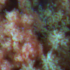

Tree-id_100-count_98.png


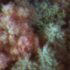

Tree-id_101-count_99.png


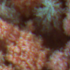

Tree-id_102-count_100.png


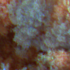

Tree-id_103-count_101.png


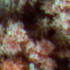

Tree-id_104-count_102.png


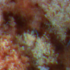

Tree-id_105-count_103.png


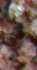

Tree-id_106-count_104.png


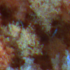

Tree-id_107-count_105.png


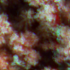

Tree-id_108-count_106.png


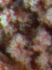

Tree-id_109-count_107.png


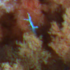

Tree-id_110-count_108.png


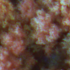

Tree-id_111-count_109.png


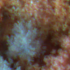

Tree-id_112-count_110.png


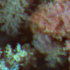

Tree-id_113-count_111.png


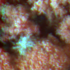

Tree-id_114-count_112.png


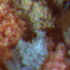

Tree-id_115-count_113.png


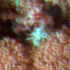

Tree-id_116-count_114.png


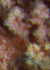

Tree-id_117-count_115.png


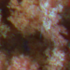

Tree-id_118-count_116.png


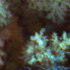

Tree-id_119-count_117.png


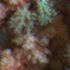

Tree-id_120-count_118.png


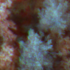

Tree-id_121-count_119.png


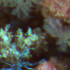

Tree-id_122-count_120.png


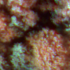

Tree-id_123-count_121.png


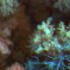

Tree-id_124-count_122.png


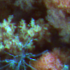

Tree-id_125-count_123.png


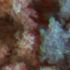

Tree-id_126-count_124.png


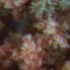

Tree-id_127-count_125.png


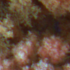

Tree-id_128-count_126.png


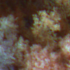

Tree-id_129-count_127.png


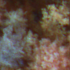

Tree-id_130-count_128.png


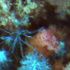

Tree-id_131-count_129.png


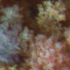

Tree-id_132-count_130.png


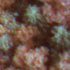

Tree-id_133-count_131.png


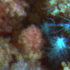

Tree-id_134-count_132.png


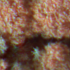

Tree-id_135-count_133.png


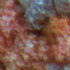

Tree-id_136-count_134.png


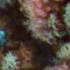

Tree-id_137-count_135.png


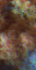

Tree-id_138-count_136.png


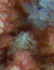

Tree-id_139-count_137.png


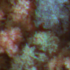

Tree-id_140-count_138.png


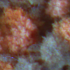

Tree-id_141-count_139.png


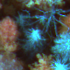

Tree-id_142-count_140.png


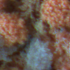

Tree-id_143-count_141.png


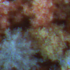

Tree-id_144-count_142.png


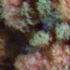

Tree-id_145-count_143.png


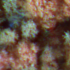

Tree-id_147-count_144.png


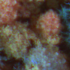

Tree-id_148-count_145.png


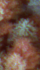

Tree-id_149-count_146.png


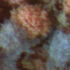

Tree-id_150-count_147.png


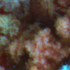

Tree-id_151-count_148.png


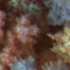

Tree-id_152-count_149.png


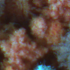

Tree-id_153-count_150.png


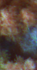

Tree-id_154-count_151.png


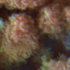

Tree-id_155-count_152.png


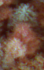

Tree-id_156-count_153.png


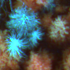

Tree-id_157-count_154.png


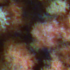

Tree-id_159-count_155.png


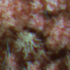

Tree-id_160-count_156.png


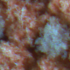

Tree-id_161-count_157.png


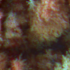

Tree-id_162-count_158.png


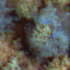

Tree-id_163-count_159.png


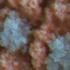

Tree-id_164-count_160.png


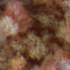

Tree-id_165-count_161.png


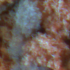

Tree-id_166-count_162.png


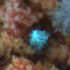

Tree-id_167-count_163.png


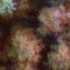

Tree-id_168-count_164.png


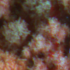

Tree-id_169-count_165.png


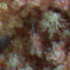

Tree-id_170-count_166.png


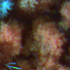

Tree-id_171-count_167.png


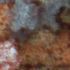

Tree-id_172-count_168.png


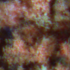

Tree-id_173-count_169.png


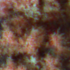

Tree-id_174-count_170.png


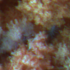

Tree-id_175-count_171.png


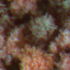

Tree-id_176-count_172.png


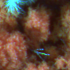

Tree-id_177-count_173.png


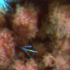

Tree-id_178-count_174.png


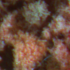

Tree-id_179-count_175.png


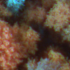

Tree-id_180-count_176.png


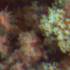

Tree-id_181-count_177.png


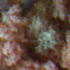

Tree-id_182-count_178.png


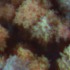

Tree-id_183-count_179.png


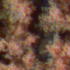

Tree-id_184-count_180.png


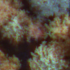

Tree-id_185-count_181.png


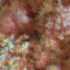

Tree-id_186-count_182.png


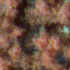

Tree-id_187-count_183.png


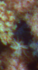

Tree-id_188-count_184.png


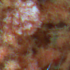

Tree-id_189-count_185.png


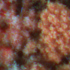

Tree-id_190-count_186.png


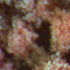

Tree-id_191-count_187.png


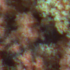

Tree-id_192-count_188.png


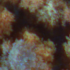

Tree-id_193-count_189.png


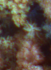

Tree-id_194-count_190.png


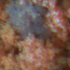

Tree-id_195-count_191.png


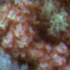

Tree-id_196-count_192.png


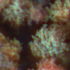

Tree-id_197-count_193.png


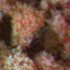

Tree-id_198-count_194.png


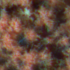

Tree-id_199-count_195.png


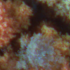

Tree-id_200-count_196.png


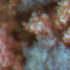

Tree-id_201-count_197.png


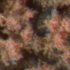

Tree-id_202-count_198.png


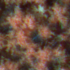

Tree-id_203-count_199.png


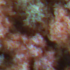

Tree-id_204-count_200.png


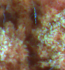

Tree-id_205-count_201.png


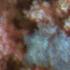

Tree-id_206-count_202.png


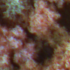

Tree-id_207-count_203.png


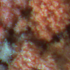

Tree-id_208-count_204.png


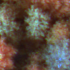

Tree-id_209-count_205.png


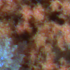

Tree-id_210-count_206.png


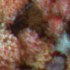

Tree-id_211-count_207.png


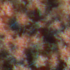

Tree-id_212-count_208.png


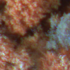

Tree-id_213-count_209.png


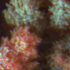

Tree-id_214-count_210.png


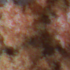

Tree-id_215-count_211.png


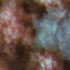

Tree-id_216-count_212.png


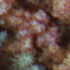

Tree-id_217-count_213.png


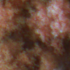

Tree-id_218-count_214.png


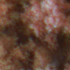

Tree-id_219-count_215.png


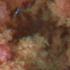

Tree-id_220-count_216.png


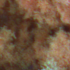

Tree-id_221-count_217.png


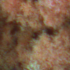

Tree-id_222-count_218.png


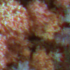

Tree-id_223-count_219.png


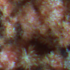

Tree-id_225-count_220.png


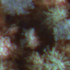

Tree-id_226-count_221.png


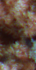

Tree-id_227-count_222.png


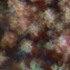

Tree-id_228-count_223.png


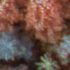

Tree-id_229-count_224.png


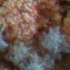

Tree-id_230-count_225.png


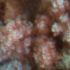

Tree-id_231-count_226.png


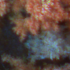

Tree-id_232-count_227.png


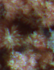

Tree-id_233-count_228.png


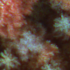

Tree-id_235-count_229.png


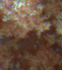

Tree-id_236-count_230.png


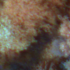

Tree-id_237-count_231.png


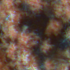

Tree-id_238-count_232.png


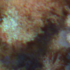

Tree-id_239-count_233.png


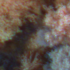

Tree-id_240-count_234.png


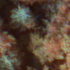

Tree-id_241-count_235.png


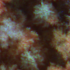

Tree-id_242-count_236.png


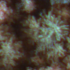

Tree-id_243-count_237.png


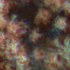

Tree-id_244-count_238.png


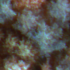

Tree-id_245-count_239.png


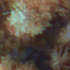

Tree-id_246-count_240.png


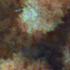

Tree-id_247-count_241.png


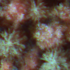

Tree-id_248-count_242.png


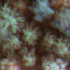

Tree-id_249-count_243.png


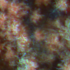

Tree-id_250-count_244.png


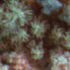

Tree-id_251-count_245.png


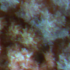

Tree-id_252-count_246.png


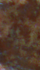

Tree-id_253-count_247.png


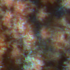

Tree-id_256-count_248.png


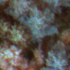

Tree-id_257-count_249.png


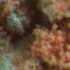

Tree-id_258-count_250.png


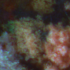

Tree-id_259-count_251.png


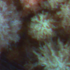

Tree-id_260-count_252.png


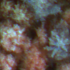

Tree-id_261-count_253.png


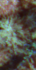

Tree-id_262-count_254.png


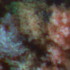

Tree-id_263-count_255.png


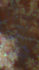

Tree-id_264-count_256.png


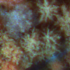

Tree-id_265-count_257.png


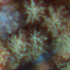

Tree-id_266-count_258.png


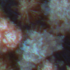

Tree-id_267-count_259.png


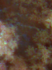

Tree-id_268-count_260.png


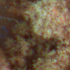

Tree-id_269-count_261.png


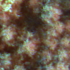

Tree-id_270-count_262.png


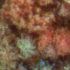

Tree-id_271-count_263.png


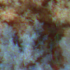

Tree-id_272-count_264.png


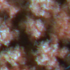

Tree-id_273-count_265.png


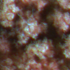

Tree-id_274-count_266.png


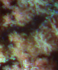

Tree-id_275-count_267.png


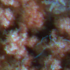

Tree-id_276-count_268.png


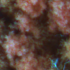

Tree-id_277-count_269.png


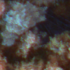

Tree-id_278-count_270.png


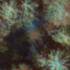

Tree-id_279-count_271.png


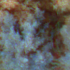

Tree-id_280-count_272.png


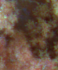

Tree-id_281-count_273.png


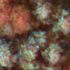

Tree-id_282-count_274.png


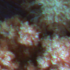

Tree-id_284-count_275.png


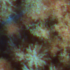

Tree-id_285-count_276.png


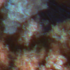

Tree-id_286-count_277.png


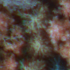

Tree-id_287-count_278.png


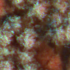

Tree-id_288-count_279.png


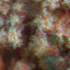

Tree-id_289-count_280.png


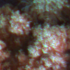

Tree-id_290-count_281.png


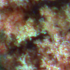

Tree-id_291-count_282.png


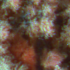

Tree-id_292-count_283.png


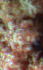

Tree-id_293-count_284.png


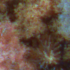

Tree-id_294-count_285.png


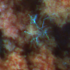

Tree-id_295-count_286.png


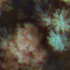

Tree-id_296-count_287.png


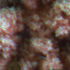

Tree-id_297-count_288.png


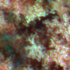

Tree-id_298-count_289.png


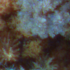

Tree-id_299-count_290.png


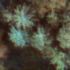

Tree-id_300-count_291.png


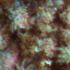

Tree-id_301-count_292.png


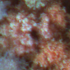

Tree-id_302-count_293.png


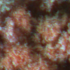

Tree-id_303-count_294.png


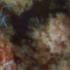

Tree-id_304-count_295.png


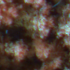

Tree-id_305-count_296.png


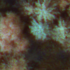

Tree-id_306-count_297.png


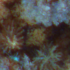

Tree-id_307-count_298.png


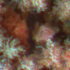

Tree-id_308-count_299.png


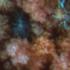

Tree-id_309-count_300.png


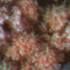

Tree-id_310-count_301.png


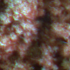

Tree-id_311-count_302.png


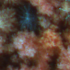

Tree-id_313-count_303.png


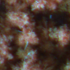

Tree-id_314-count_304.png


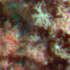

Tree-id_315-count_305.png


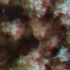

Tree-id_316-count_306.png


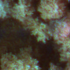

Tree-id_317-count_307.png


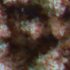

Tree-id_318-count_308.png


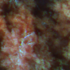

Tree-id_319-count_309.png


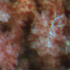

Tree-id_320-count_310.png


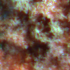

Tree-id_321-count_311.png


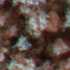

Tree-id_322-count_312.png


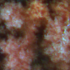

Tree-id_323-count_313.png


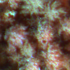

Tree-id_324-count_314.png


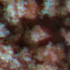

Tree-id_325-count_315.png


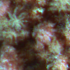

Tree-id_326-count_316.png


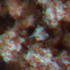

Tree-id_327-count_317.png


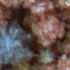

Tree-id_328-count_318.png


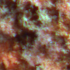

Tree-id_329-count_319.png


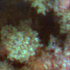

Tree-id_330-count_320.png


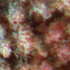

Tree-id_331-count_321.png


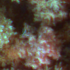

Tree-id_332-count_322.png


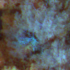

Tree-id_333-count_323.png


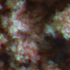

Tree-id_334-count_324.png


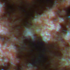

Tree-id_335-count_325.png


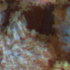

Tree-id_336-count_326.png


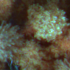

Tree-id_337-count_327.png


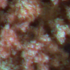

Tree-id_338-count_328.png


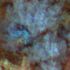

Tree-id_339-count_329.png


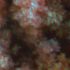

Tree-id_340-count_330.png


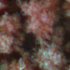

Tree-id_341-count_331.png


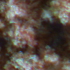

Tree-id_342-count_332.png


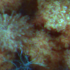

Tree-id_343-count_333.png


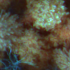

Tree-id_344-count_334.png


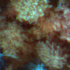

Tree-id_345-count_335.png


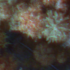

Tree-id_346-count_336.png


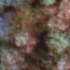

Tree-id_347-count_337.png


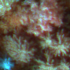

Tree-id_348-count_338.png


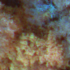

Tree-id_349-count_339.png


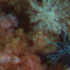

Tree-id_350-count_340.png


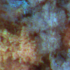

Tree-id_351-count_341.png


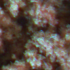

Tree-id_352-count_342.png


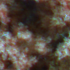

Tree-id_353-count_343.png


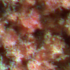

Tree-id_354-count_344.png


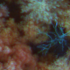

Tree-id_355-count_345.png


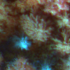

Tree-id_356-count_346.png


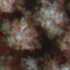

Tree-id_357-count_347.png


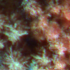

Tree-id_358-count_348.png


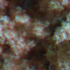

Tree-id_359-count_349.png


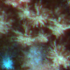

Tree-id_360-count_350.png


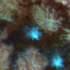

Tree-id_361-count_351.png


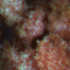

Tree-id_362-count_352.png


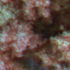

Tree-id_363-count_353.png


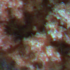

Tree-id_364-count_354.png


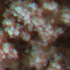

Tree-id_365-count_355.png


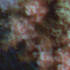

Tree-id_366-count_356.png


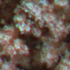

Tree-id_367-count_357.png


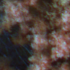

Tree-id_369-count_358.png


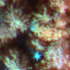

Tree-id_370-count_359.png


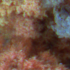

Tree-id_371-count_360.png


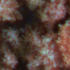

Tree-id_372-count_361.png


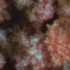

Tree-id_373-count_362.png


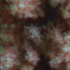

Tree-id_374-count_363.png


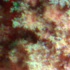

Tree-id_375-count_364.png


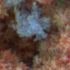

Tree-id_376-count_365.png


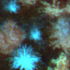

Tree-id_377-count_366.png


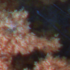

Tree-id_378-count_367.png


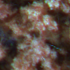

Tree-id_379-count_368.png


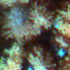

Tree-id_380-count_369.png


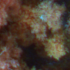

Tree-id_381-count_370.png


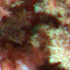

Tree-id_382-count_371.png


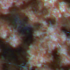

Tree-id_383-count_372.png


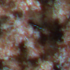

Tree-id_384-count_373.png


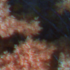

Tree-id_385-count_374.png


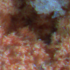

Tree-id_386-count_375.png


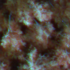

Tree-id_388-count_376.png


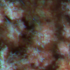

Tree-id_389-count_377.png


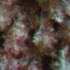

Tree-id_390-count_378.png


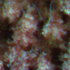

Tree-id_391-count_379.png


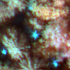

Tree-id_392-count_380.png


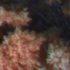

Tree-id_393-count_381.png


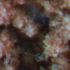

Tree-id_394-count_382.png


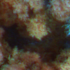

Tree-id_395-count_383.png


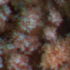

Tree-id_396-count_384.png


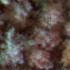

Tree-id_397-count_385.png


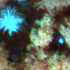

Tree-id_398-count_386.png


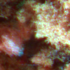

Tree-id_399-count_387.png


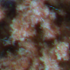

Tree-id_400-count_388.png


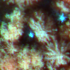

Tree-id_401-count_389.png


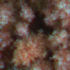

Tree-id_402-count_390.png


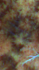

Tree-id_403-count_391.png


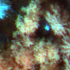

Tree-id_404-count_392.png


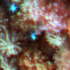

Tree-id_405-count_393.png


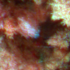

Tree-id_406-count_394.png


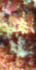

Tree-id_407-count_395.png


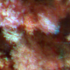

Tree-id_408-count_396.png


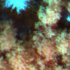

Tree-id_409-count_397.png


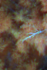

Tree-id_410-count_398.png


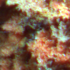

Tree-id_411-count_399.png


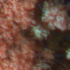

Tree-id_412-count_400.png


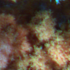

Tree-id_413-count_401.png


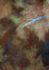

Tree-id_414-count_402.png


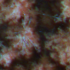

Tree-id_415-count_403.png


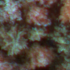

Tree-id_417-count_404.png


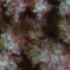

Tree-id_418-count_405.png


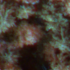

Tree-id_419-count_406.png


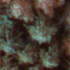

Tree-id_420-count_407.png


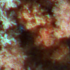

Tree-id_421-count_408.png


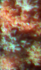

Tree-id_422-count_409.png


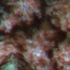

Tree-id_423-count_410.png


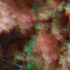

Tree-id_424-count_411.png


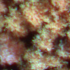

Tree-id_425-count_412.png


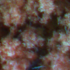

Tree-id_426-count_413.png


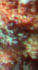

Tree-id_427-count_414.png


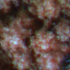

Tree-id_428-count_415.png


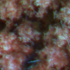

Tree-id_430-count_416.png


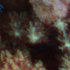

Tree-id_431-count_417.png


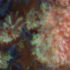

Tree-id_432-count_418.png


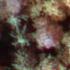

Tree-id_433-count_419.png


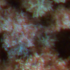

Tree-id_434-count_420.png


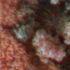

Tree-id_435-count_421.png


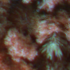

Tree-id_436-count_422.png


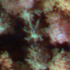

Tree-id_437-count_423.png


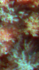

Tree-id_438-count_424.png


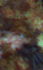

Tree-id_439-count_425.png


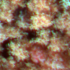

Tree-id_440-count_426.png


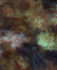

Tree-id_441-count_427.png


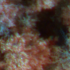

Tree-id_442-count_428.png


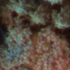

Tree-id_443-count_429.png


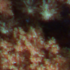

Tree-id_444-count_430.png


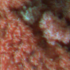

Tree-id_445-count_431.png


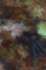

Tree-id_448-count_432.png


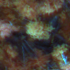

Tree-id_449-count_433.png


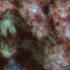

Tree-id_450-count_434.png


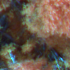

Tree-id_451-count_435.png


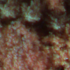

Tree-id_452-count_436.png


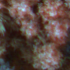

Tree-id_453-count_437.png


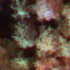

Tree-id_454-count_438.png


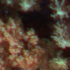

Tree-id_455-count_439.png


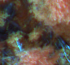

Tree-id_456-count_440.png


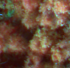

Tree-id_457-count_441.png


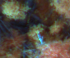

Tree-id_459-count_442.png


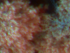

Tree-id_460-count_443.png


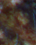

Tree-id_461-count_444.png


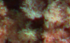

Tree-id_462-count_445.png


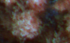

Tree-id_463-count_446.png


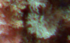

Tree-id_464-count_447.png


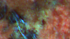

Tree-id_465-count_448.png


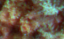

Tree-id_466-count_449.png


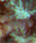

Tree-id_467-count_450.png


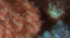

Tree-id_468-count_451.png


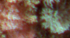

Tree-id_469-count_452.png


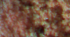

Tree-id_470-count_453.png


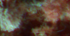

Tree-id_471-count_454.png


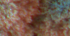

1880.48s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [29]:
# Display results
data_out = json.dumps(result, indent=2)
print(data_out)

#Display mask used for tree detection.
print("mask.png - blue:")
display(Image(filename='mask.png',width=800, height=800))
print("mask1.png - red:")
display(Image(filename='mask1.png',width=800, height=800))
print("mask2.png - green:")
display(Image(filename='mask2.png',width=800, height=800))

# Display labled mask where we detected trees
print("mask_labeled.png:")
display(Image(filename='mask_labeled.png',width=800, height=800))
print("mask_labeled1.png:")
display(Image(filename='mask_labeled1.png',width=800, height=800))
print("mask_labeled2;.png:")
display(Image(filename='mask_labeled2.png',width=800, height=800))


with io.open('data.json', 'w', encoding='utf8') as outfile:
    outfile.write(data_out)
    
    
    
# Display each individual tree cropped out of the original image
k=-1
l=0

for i in enumerate(result['trees']):
    k+=1
    l+=1

    print("Tree-id_"+ str(result['trees'][k]['id'])+ '-count_' + str(l) +'.png')
    display(Image(filename='tree-id_' + str(result['trees'][k]['id']) + '-count_' + str(l) +'.png'))

    
    
    
# оценку качества модели можно провести зная координаты нескольких деревьев    
# данные на выходе легко получить в любом другом формате - мне показалось, json удобнее всего    
# на выход также можно посмотреть снимки каждого детектированного дерева - удалите/закоммите строчку ниже
!rm *.png